In [1]:
import tensorflow as tf

In [6]:
var = tf.random.uniform([1]).

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.524464  , 0.07029223, 0.06155729],
       [0.06091511, 0.79075634, 0.72493136],
       [0.9779769 , 0.3734287 , 0.19593406]], dtype=float32)>

In [32]:
def data_creation(w=0.1, b=0.5 , n=100):
    X= tf.random.uniform(shape=[n])
    noise = tf.random.normal(shape=[n], mean=0.0, stddev=0.01)
    Y = X*w + b + noise
    return (X.numpy(),Y.numpy())
X,Y = data_creation()


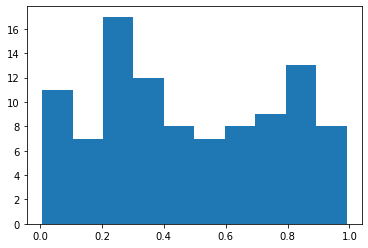

In [13]:

%matplotlib inline
import matplotlib.pyplot as mpl
mpl.hist(X.numpy())
mpl.show()

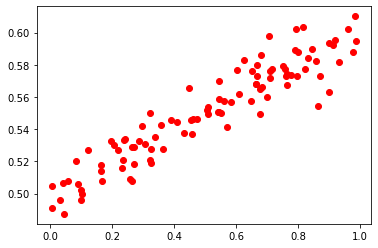

In [17]:
mpl.plot(X,Y, 'ro' )

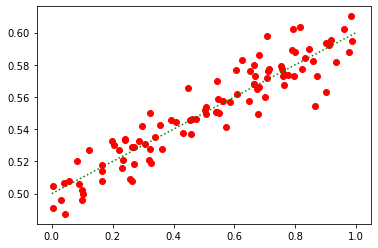

In [21]:
w=0.1
b=0.5
mpl.plot(X,Y, 'ro' )
mpl.plot([0,1],[0*w+b,1*w+b], 'g:' )

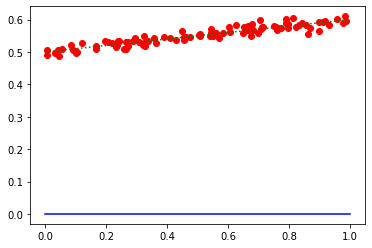

In [28]:
w=0.1
b=0.5
mpl.plot(X,Y, 'ro' )
mpl.plot([0,1],[0*w+b,1*w+b], 'g:' )
w_guess=0.0
b_guess=0.0
# mpl.plot(X,Y, 'ro' )
mpl.plot([0,1],[0*w_guess+b_guess,1*w_guess+b_guess], 'b' )

In [54]:
def predict(x,w=w,b=b):
    y = w*x + b
    return y

In [49]:
def mean_squared_error(y_pred,y):
    
    return tf.reduce_mean(tf.square(y_pred-y))
    


In [50]:
print(mean_squared_error(predict(X),Y))

tf.Tensor(0.30534047, shape=(), dtype=float32)


In [70]:
learning_rate =  0.1
steps = 500
w=tf.Variable(0.0)
b=tf.Variable(-1.0)
for step in range(steps):
    with tf.GradientTape() as tape:
        predictions = predict(X,w=w,b=b)
        loss = mean_squared_error(predictions,Y)
    gradients = tape.gradient(loss,[w,b])
    w.assign_sub(gradients[0]*learning_rate)
    b.assign_sub(gradients[1]*learning_rate)
    
    if step%20 == 0 :
        print("Step {}".format(step))

Step 0
Step 20
Step 40
Step 60
Step 80
Step 100
Step 120
Step 140
Step 160
Step 180
Step 200
Step 220
Step 240
Step 260
Step 280
Step 300
Step 320
Step 340
Step 360
Step 380
Step 400
Step 420
Step 440
Step 460
Step 480


In [72]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.10486919>

In [73]:
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.4968717>

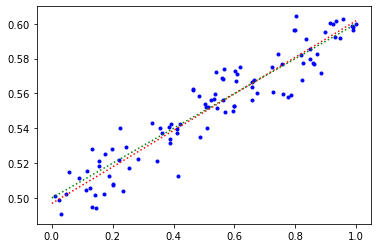

In [74]:
w_true=0.1
b_true=0.5
mpl.plot(X,Y, 'b.' )
mpl.plot([0,1],[0*w+b,1*w+b], 'r:' )
mpl.plot([0,1],[0*w_true+b_true,1*w_true+b_true], 'g:' )